In this tutorial we will learn how to scale or transform the features using different techniques. 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
diabetes=pd.read_csv('diabetes_cleaned.csv')

In [47]:
features_df= diabetes.drop('Outcome',axis = 1)
target_df=diabetes['Outcome']

In [48]:
features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.539062,72.405184,29.108073,152.222767,32.307682,0.471876,33.240885
std,3.369578,30.490660,12.096346,8.791221,97.387162,6.986674,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,-17.757186,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,25.000000,89.647494,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.000000,130.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,188.448695,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


As you can see range of columns are very high for e.g. Age range is 21-81. ML models always give you better result when all of the features are in same range. So let's do that using various techniques.


## Feature Scaling and Standardization

When all features are in different range then we change the range of those features to a specific scale ,this method is called feature scaling.

- Normalization and Standardization are two specific Feature Scaling methods.

### Min Max Scaler

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
rescaled_features=scaler.fit_transform(features_df)
rescaled_features

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [50]:
rescaled_diabetes = pd.DataFrame(rescaled_features, columns=features_df.columns)
rescaled_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.274029,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.101819,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.333110,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.129385,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.215057,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.228950,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.204424,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.150224,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.239130,0.221796,0.243354,0.115713,0.433333


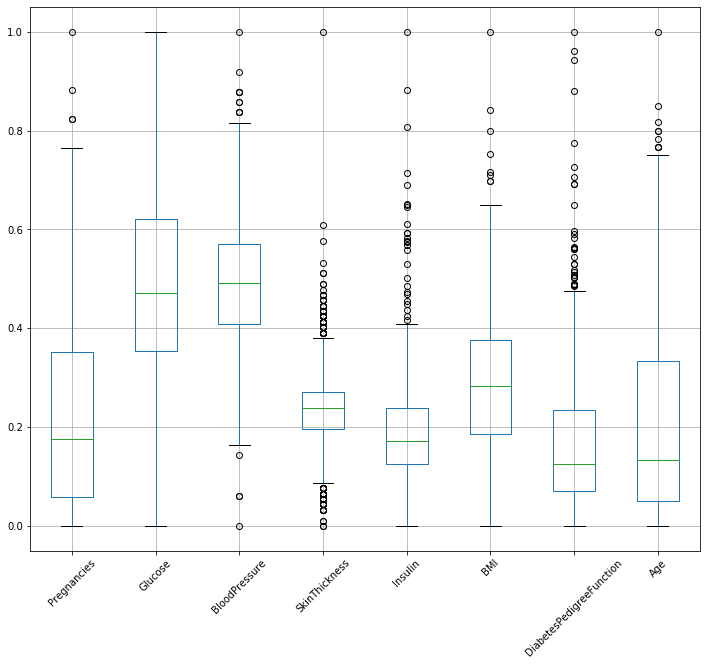

In [51]:
rescaled_diabetes.boxplot(figsize=(12,10),rot=45)

You can see all the data column's range is between 0-1 now.

But here is one Catch!! MinMaxScaler is very sensitive to your data so make sure your whole prediction should not be hampered , like in this case if you see it has change age's min to 0 but that is not the one we are looking for.

### Standardization


Standardization is applied on feature wise , we calculate the mean of each feature then subtract each feature value from the mean and then divide it with the standard deivation
Standardization centers mean of all our numeric features at 0 and expresses each value of the feature by the multiples of the std dev. 

This is usually preferred because it is less outlier sensitive.

In [52]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
standardized_features=scaler.fit_transform(features_df)

In [53]:
standardized_diabetes = pd.DataFrame(standardized_features, columns=features_df.columns)
standardized_diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.868403,-0.033518,0.670643,0.685496,0.185089,0.468492,1.425995
1,-0.844885,-1.199150,-0.529859,-0.012301,-0.842893,-0.817471,-0.365061,-0.190672
2,1.233880,2.017044,-0.695306,-0.012301,1.209840,-1.290106,0.604397,-0.105584
3,-0.844885,-1.067877,-0.529859,-0.695245,-0.598238,-0.602636,-0.920763,-1.041549
4,-1.141852,0.507402,-2.680669,0.670643,0.162111,1.545707,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.674057,0.297376,2.150354,0.285411,0.084833,-0.908682,2.532136
764,-0.547919,0.015127,-0.198965,-0.239949,0.067744,0.643403,-0.398282,-0.531023
765,0.342981,-0.017691,-0.033518,-0.695245,-0.413288,-0.874760,-0.685193,-0.275760
766,-0.844885,0.146400,-1.026200,-0.012301,0.221915,-0.316191,-0.371101,1.170732


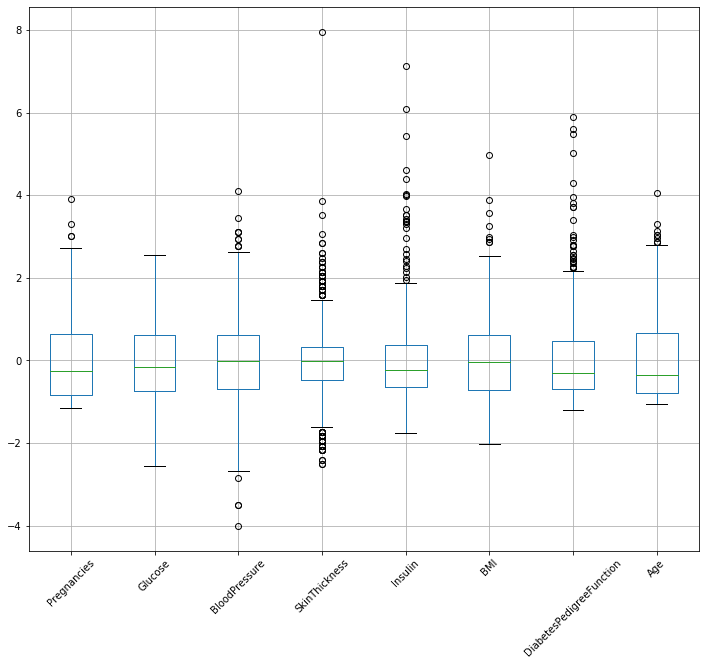

In [54]:
standardized_diabetes.boxplot(figsize=(12,10),rot=45)

You can see that all features' mean have been centered to zero and if any feature is not having many outliers then its median should not be far away from the mean.

### Normalization

Normalization converts the feature vectors to their unit norm representations , there are different types of unit norms such as
1. L1 Normalization
2. L2 Normalization
3. Max Normalization

This is not useful with data having outliers!

In [55]:
from sklearn.preprocessing import Normalizer

#### L1 Normailization

In [56]:
normalizer = Normalizer(norm='l1')
l1_normalized_features = normalizer.fit_transform(features_df)

In [57]:
l1_normalized_diabetes = pd.DataFrame(l1_normalized_features, columns=features_df.columns)
l1_normalized_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.010635,0.262335,0.127622,0.062039,0.388074,0.059557,0.001111,0.088627
1,0.003235,0.274956,0.213495,0.093809,0.227047,0.086045,0.001135,0.100278
2,0.013116,0.300029,0.104928,0.047546,0.442615,0.038200,0.001102,0.052464
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


In [58]:
l1_normalized_diabetes.iloc[0]

Pregnancies                 0.010635
Glucose                     0.262335
BloodPressure               0.127622
SkinThickness               0.062039
Insulin                     0.388074
BMI                         0.059557
DiabetesPedigreeFunction    0.001111
Age                         0.088627
Name: 0, dtype: float64

Every row in your dataset is a feature vector and normalization is a technique to convert those feature vector by their unit magnitude
there are different types of unit magnitudes here we have converted using L1 unit magnitude.

In L1 normalization summation of absolute values of these normalized features is 1.

In [59]:
l1_normalized_diabetes.iloc[0].abs().sum()

1.0

#### L2 Normalization

In L2 normalization every feature vector or records in your dataset will be converted to their L2 unit magnitude and sum of the individual features' square will be 1

In [60]:
normalizer = Normalizer(norm='l2')
l2_normalized_features = normalizer.fit_transform(features_df)
l2_normalized_diabetes = pd.DataFrame(l2_normalized_features, columns=features_df.columns)
l2_normalized_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.021225,0.523547,0.254698,0.123812,0.774487,0.118859,0.002218,0.176874
1,0.007251,0.616359,0.478585,0.210287,0.508963,0.192884,0.002545,0.224790
2,0.023805,0.544535,0.190439,0.086292,0.803320,0.069332,0.002000,0.095219
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [61]:
l2_normalized_diabetes.iloc[0].pow(2).sum()

0.9999999999999997

#### Maximum Normalization

Now let's talk about Maximum normalization here the maximum value of a feature vector is converted to 1 and other values of that feature vector will be converted in terms of this maximum.

In [62]:
normalizer = Normalizer(norm='max')
max_normalized_features = normalizer.fit_transform(features_df)
print(type(max_normalized_features))
max_normalized_diabetes = pd.DataFrame(max_normalized_features, columns=features_df.columns)
max_normalized_diabetes.head()

<class 'numpy.ndarray'>


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027405,0.675991,0.328861,0.159863,1.000000,0.153468,0.002864,0.228375
1,0.011765,1.000000,0.776471,0.341176,0.825756,0.312941,0.004129,0.364706
2,0.029633,0.677856,0.237064,0.107420,1.000000,0.086306,0.002489,0.118532
3,0.010638,0.946809,0.702128,0.244681,1.000000,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.000000,0.256548,0.013619,0.196429


if you look at the above df you can see one feature in every record is transformed into 1 and other features are represented in terms of this max.

# Binarizer:

Now sometimes it may be required that we would want to discretize our numerical features there we can use binarizer.
In binarizer we provide a threshold value for each feature and it will convert all values which is less than the threshold to zero and all values which is greater than the threshold to 1. 

In [63]:
scaler=Binarizer(threshold=float((features_df[['Pregnancies']]).mean()))
binarized_features=scaler.fit_transform(features_df[['Pregnancies']])

In [64]:
from sklearn.preprocessing import Binarizer
for i in range(1,features_df.shape[1]):
    scaler=Binarizer(threshold=float(features_df[features_df.columns[i]].mean())). \
                                    fit(features_df[[features_df.columns[i]]])
    new_binarized_feature = scaler.transform(features_df[[features_df.columns[i]]])
    binarized_features = np.concatenate((binarized_features,new_binarized_feature),axis=1)

In [65]:
binarized_diabetes = pd.DataFrame(binarized_features, columns=features_df.columns)
binarized_diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
9,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


You can see all vectors have been represented using zero or 1
Now that we have transformed our data using different techniques let's do some classification now.

Now lets build a classification model and see the differences:

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
def buildmodel(X,Y,test_frac):
    x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=test_frac)
    model =LogisticRegression(solver='liblinear').fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('Accuracy of the model is',accuracy_score(y_test,y_pred))

In [68]:
buildmodel(rescaled_diabetes,target_df,test_frac=.2)#using MinMaxScaler

Accuracy of the model is 0.7857142857142857


In [69]:
buildmodel(standardized_diabetes,target_df,test_frac=.2)#using StandardScaler

Accuracy of the model is 0.7662337662337663


In [70]:
buildmodel(l1_normalized_features,target_df,test_frac=.2)

Accuracy of the model is 0.6103896103896104


In [71]:
buildmodel(l2_normalized_features,target_df,test_frac=.2)

Accuracy of the model is 0.6623376623376623


In [72]:
buildmodel(max_normalized_features,target_df,test_frac=.2)

Accuracy of the model is 0.7337662337662337


In [73]:
buildmodel(binarized_features,target_df,test_frac=.2)

Accuracy of the model is 0.6753246753246753
